INTRODUCTION

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

Working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. Provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

-Demographics (city, age, gender etc.)
-Tenure information (joining date, Last Date)
-Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)


EXPLORING THE DATA

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('ola_driver.csv')

In [48]:
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


Column Profiling:

1. MMMM-YY : Reporting Date (Monthly)
2. Driver_ID : Unique id for drivers
3. Age : Age of the driver
4. Gender : Gender of the driver – Male : 0, Female: 1
5. City : City Code of the driver
6. Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7. Income : Monthly average Income of the driver
8. Date Of Joining : Joining date for the driver
9. LastWorkingDate : Last date of working for the driver
10. Joining Designation : Designation of the driver at the time of joining
11. Grade : Grade of the driver at the time of reporting
12. Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
13. Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


In [49]:
# For MMM-YY (which is MM/DD/YY)
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], format="%m/%d/%y", errors='coerce')

# For Dateofjoining and LastWorkingDate (which are DD/MM/YY)
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format="%d/%m/%y", errors='coerce')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], format="%d/%m/%y", errors='coerce')

In [50]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

NOTE: The 'LastWorkingDate' column contains a high proportion of null values due to the data structure, where each driver's monthly record is represented as a separate row. Consequently, drivers who are still active have no exit date, and those who exited the company have this field populated only in the record corresponding to their final month.

In [ ]:
#Conducting KNN imputation on the columns 'Gender' and 'City' to fill the null values

from sklearn.impute import KNNImputer
import pandas as pd

features = ['Age', 'Gender', 'Education_Level', 'Income', 'Quarterly Rating']

# Initialize imputer
imputer = KNNImputer(n_neighbors=5)

# Apply only on relevant subset of data
imputed_data = imputer.fit_transform(df[features])

# Replace original columns with imputed values
df[features] = pd.DataFrame(imputed_data, columns=features)

In [ ]:
#Creating the column 'Rating Change' to highlight any monthly change in the driver rating
df = df.sort_values(by=['Driver_ID', 'MMM-YY'])

df['Prev_value'] = df.groupby('Driver_ID')['Quarterly Rating'].shift(1)

df['Rating_change'] = (df['Quarterly Rating']>df['Prev_value']).astype(int)

Rating_flag = df.groupby('Driver_ID')['Rating_change'].max().reset_index()

Rating_flag.rename(columns={'Rating_change':'Has_rating_increased'}, inplace = True)

In [53]:
df.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Prev_value,Rating_change
0,0,2019-01-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1,1,2381060,2.0,NaN,0
1,1,2019-02-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,NaT,1,1,-665480,2.0,2.0,0
2,2,2019-03-01,1,28.0,0.0,C23,2.0,57387.0,2018-12-24,2019-11-03,1,1,0,2.0,2.0,0
3,3,2020-11-01,2,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2,2,0,1.0,NaN,0
4,4,2020-12-01,2,31.0,0.0,C7,2.0,67016.0,2020-06-11,NaT,2,2,0,1.0,1.0,0
5,5,2019-12-01,4,43.0,0.0,C13,2.0,65603.0,2019-07-12,NaT,2,2,0,1.0,NaN,0
6,6,2020-01-01,4,43.0,0.0,C13,2.0,65603.0,2019-07-12,NaT,2,2,0,1.0,1.0,0
7,7,2020-02-01,4,43.0,0.0,C13,2.0,65603.0,2019-07-12,NaT,2,2,0,1.0,1.0,0
8,8,2020-03-01,4,43.0,0.0,C13,2.0,65603.0,2019-07-12,NaT,2,2,350000,1.0,1.0,0
9,9,2020-04-01,4,43.0,0.0,C13,2.0,65603.0,2019-07-12,2020-04-27,2,2,0,1.0,1.0,0


In [ ]:
#Creating the column 'Income_increased' to show how a driver's monthly income changed from their first to last entry
df = df.sort_values(by=['Driver_ID', 'MMM-YY'])

income_change = df.groupby('Driver_ID').agg(
    first_income=('Income', 'first'),
    last_income=('Income', 'last')
)

income_change['Income_increased'] = (income_change['last_income'] > income_change['first_income']).astype(int)

income_change.head()

,first_income,last_income,Income_increased
Driver_ID,,,
1,57387.0,57387.0,0
2,67016.0,67016.0,0
4,65603.0,65603.0,0
5,46368.0,46368.0,0
6,78728.0,78728.0,0


AGGREGATING THE DATASET ON 'DRIVER_ID'

In [55]:
df_driver = pd.DataFrame(df['Driver_ID'].unique(), columns = ['Driver_ID'])

In [56]:
grouped = df.groupby('Driver_ID')

In [57]:
aggregated = grouped.agg({
    'Age':'mean',
    'Gender':'first',
    'City':'last',
    'Education_Level':'last',
    'Income':'mean',
    'Quarterly Rating':'mean',
    'Total Business Value':'sum',
    'Grade':'last',
    'Dateofjoining':'first',
    'LastWorkingDate':'last',
    'MMM-YY':'last',
    'Rating_change':'max'
})

aggregated = aggregated.reset_index()

aggregated = aggregated.merge(income_change, on='Driver_ID', how='left')

In [58]:
aggregated.head(20)

,Driver_ID,Age,Gender,City,Education_Level,Income,Quarterly Rating,Total Business Value,Grade,Dateofjoining,LastWorkingDate,MMM-YY,Rating_change,first_income,last_income,Income_increased
0,1,28.000000,0.0,C23,2.0,57387.000000,2.000000,1715580,1,2018-12-24,2019-11-03,2019-03-01,0,57387.0,57387.0,0
1,2,31.000000,0.0,C7,2.0,67016.000000,1.000000,0,2,2020-06-11,NaT,2020-12-01,0,67016.0,67016.0,0
2,4,43.000000,0.0,C13,2.0,65603.000000,1.000000,350000,2,2019-07-12,2020-04-27,2020-04-01,0,65603.0,65603.0,0
3,5,29.000000,0.0,C9,0.0,46368.000000,1.000000,120360,1,2019-09-01,2019-07-03,2019-03-01,0,46368.0,46368.0,0
4,6,31.000000,1.0,C11,1.0,78728.000000,1.600000,1265000,3,2020-07-31,NaT,2020-12-01,1,78728.0,78728.0,0
5,8,34.000000,0.0,C2,0.0,70656.000000,1.000000,0,3,2020-09-19,2020-11-15,2020-11-01,0,70656.0,70656.0,0
6,11,28.000000,1.0,C19,2.0,42172.000000,1.000000,0,1,2020-07-12,NaT,2020-12-01,0,42172.0,42172.0,0
7,12,35.000000,0.0,C23,2.0,28116.000000,2.500000,2607180,1,2019-06-29,2019-12-21,2019-12-01,0,28116.0,28116.0,0
8,13,29.608696,0.0,C19,2.0,119227.000000,1.260870,10213040,4,2015-05-28,2020-11-25,2020-11-01,1,119227.0,119227.0,0
9,14,39.000000,1.0,C26,0.0,19734.000000,1.000000,0,3,2020-10-16,NaT,2020-12-01,0,19734.0,19734.0,0


In [ ]:
#Creating the 'Target' column in the new aggregated dataset to show which drivers have left the company. Depending on whether they have a last working date or not
aggregated['Target'] = aggregated['LastWorkingDate'].notna().astype(int)

In [ ]:
#Changing to appropriate data type
aggregated['Age'] = aggregated['Age'].astype(int)
aggregated['Gender'] = aggregated['Gender'].astype(int)
aggregated['Education_Level'] = aggregated['Education_Level'].astype(int)
aggregated['Quarterly Rating'] = aggregated['Quarterly Rating'].astype(int)
aggregated['Income'] = aggregated['Income'].astype(int)

In [ ]:
#adding the No_of_reportings column

report_counts = df.groupby('Driver_ID').size().reset_index(name='Report_Count')

aggregated = aggregated.merge(report_counts, on='Driver_ID', how='left')

In [62]:
joining_designation = df[['Driver_ID', 'Joining Designation']].drop_duplicates(subset='Driver_ID')
aggregated = aggregated.merge(joining_designation, on='Driver_ID', how='left')

CHECKING FOR OUTLIERS

In [ ]:
num_cols = ['Report_Count', 'Age', 'Total Business Value', 'Income']

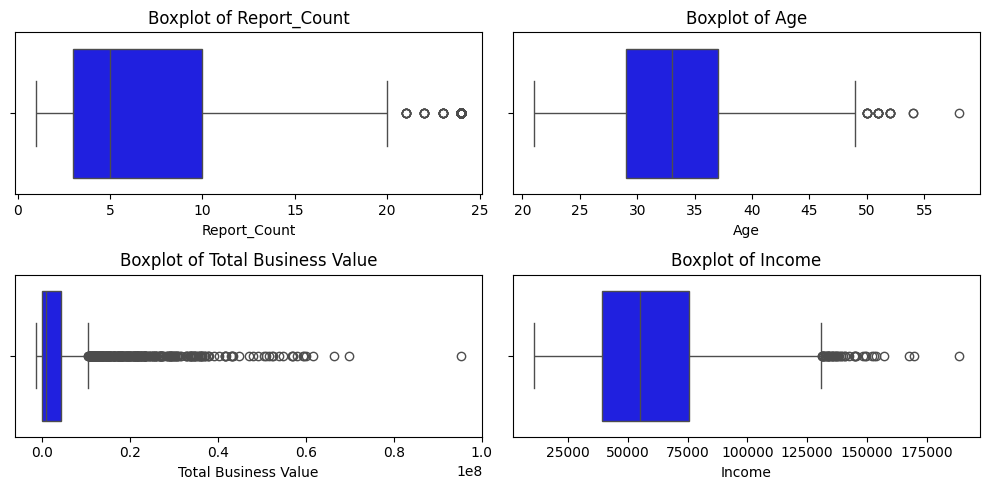

In [64]:
fig = plt.figure(figsize=(10,5))
i=1
for col in num_cols:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x=aggregated[col], color='blue')
    plt.title(f'Boxplot of {col}')
    i += 1

plt.tight_layout()
plt.show()

### Highlights:
- Data is showing outliers specially in 'Total Business Value'
- We will keep the dataset intact because the diversity in the dataset signifies the range of each driver

### Analysis and Distribution of Variables
- Statistical Summary
- UniVariate Analysis
- BiVariate Analysis
- Impact of Each Feature on Churn

Statistical Summary

In [ ]:
df3 = aggregated.copy()

In [66]:
df3.nunique()

Driver_ID               2381
Age                       34
Gender                     2
City                      29
Education_Level            3
Income                  2339
Quarterly Rating           4
Total Business Value    1629
Grade                      5
Dateofjoining            869
LastWorkingDate          493
MMM-YY                    24
Rating_change              2
first_income            2339
last_income             2339
Income_increased           2
Target                     2
Report_Count              24
Joining Designation        5
dtype: int64

In [67]:
columns_to_convert = ['Report_Count', 'Gender', 'City', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Rating_change', 'Income_increased', 'Target']

In [68]:
df3[columns_to_convert] = df3[columns_to_convert].apply(lambda x: x.astype('category'))

In [69]:
df3.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,NaN,NaN,NaN,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Age,2381.0,NaN,NaN,NaN,33.150357,21.0,29.0,33.0,37.0,58.0,5.865802
Gender,2381.0,2.0,0.0,1405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,2381,29,C20,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,2381.0,3.0,2.0,802.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2381.0,NaN,NaN,NaN,59232.451071,10747.0,39104.0,55285.0,75835.0,188418.0,28298.209397
Quarterly Rating,2381.0,4.0,1.0,1709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Business Value,2381.0,NaN,NaN,NaN,4586741.822764,-1385530.0,0.0,817680.0,4173650.0,95331060.0,9127115.313446
Grade,2381.0,5.0,2.0,855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dateofjoining,2381,NaN,NaN,NaN,2019-01-27 12:58:58.009239808,2013-01-04 00:00:00,2018-06-26 00:00:00,2019-06-23 00:00:00,2020-04-14 00:00:00,2020-12-28 00:00:00,NaN


### Observations:

- 5 number of reportings have the highest frequency
- Higher ratio of male drivers than females
- c20 is the city with most drivers
- Maximum drivers are of grade 2
- Maximum number of drivers have a quarterly rating of 1

Categorical Features

In [ ]:
newcat_cols = ['Gender', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Rating_change', 'Income_increased', 'Target']

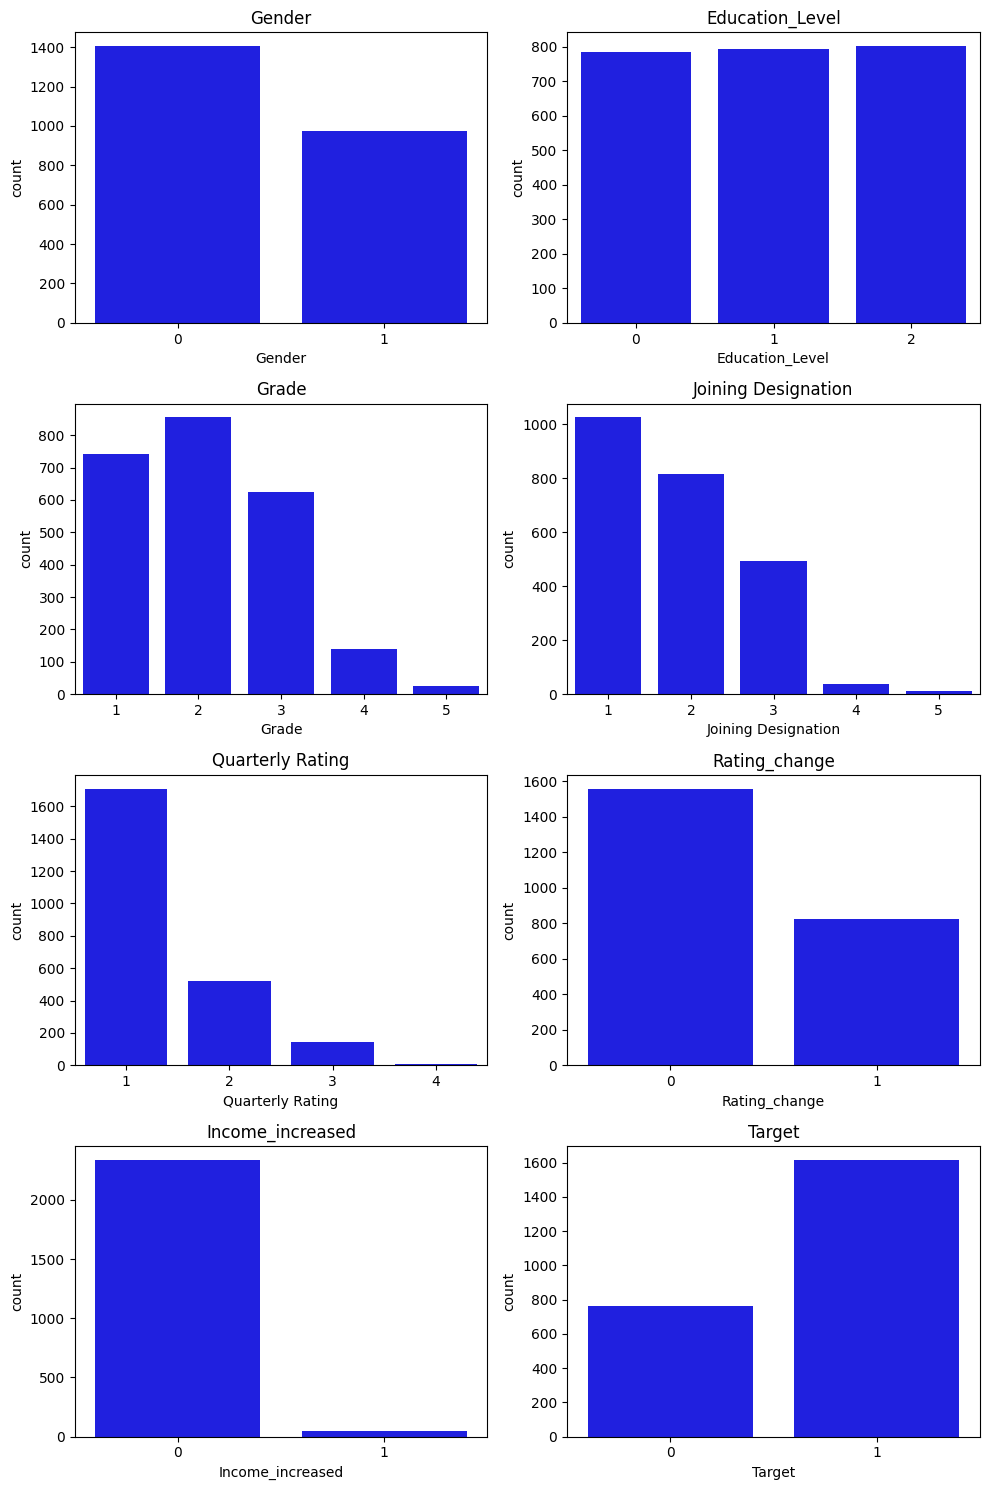

In [71]:
plt.figure(figsize = (10,15))
i=1
for col in newcat_cols:
    ax=plt.subplot(4,2,i)
    sns.countplot(x=aggregated[col], color='Blue')
    plt.title(f'{col}')
    i += 1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Cities')

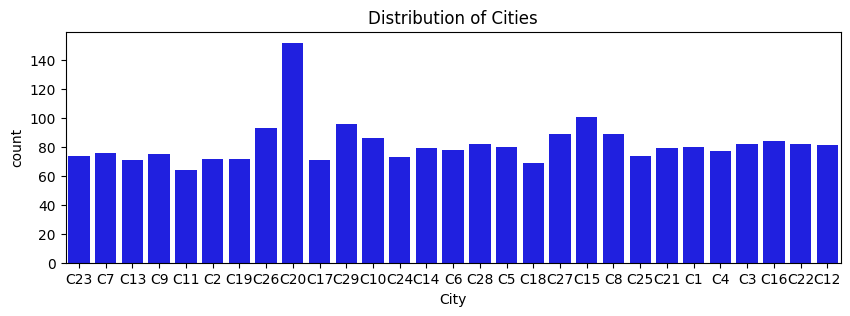

In [72]:
plt.figure(figsize=(10,3))
sns.countplot(x=aggregated['City'], color='Blue')
plt.title('Distribution of Cities')

Text(0.5, 1.0, 'Distribution of year of last working date')

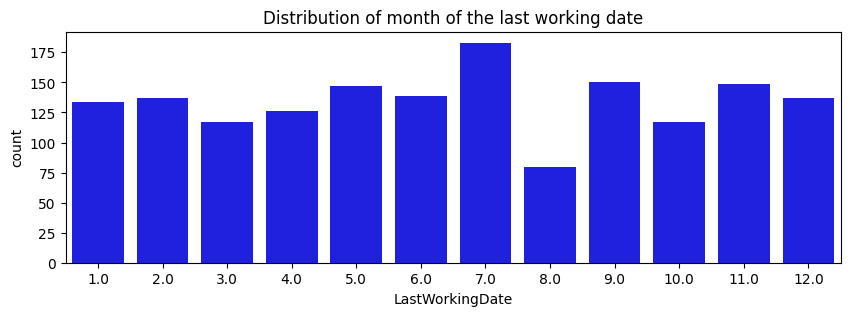

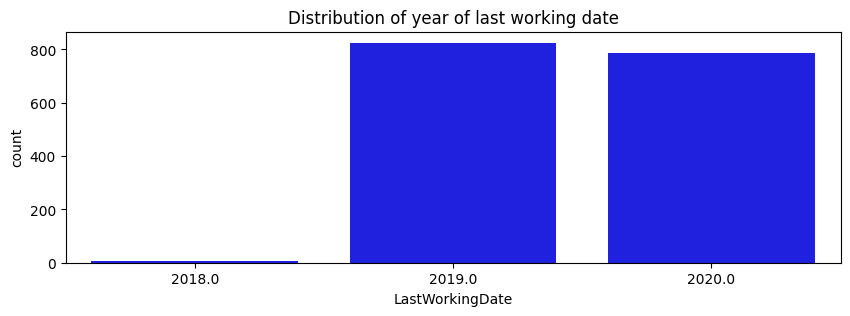

In [73]:
plt.figure(figsize=(10,3))
sns.countplot(x=aggregated['LastWorkingDate'].dt.month, color = 'blue')
plt.title('Distribution of month of the last working date')

plt.figure(figsize=(10,3))
sns.countplot(x=aggregated['LastWorkingDate'].dt.year, color='blue')
plt.title('Distribution of year of last working date')

Text(0.5, 1.0, 'Distribution of year of joining date')

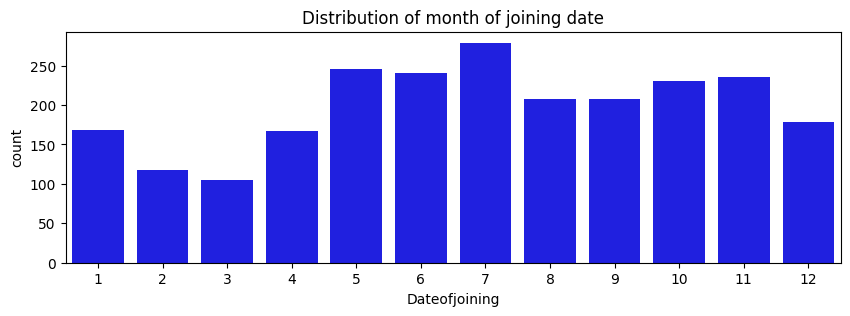

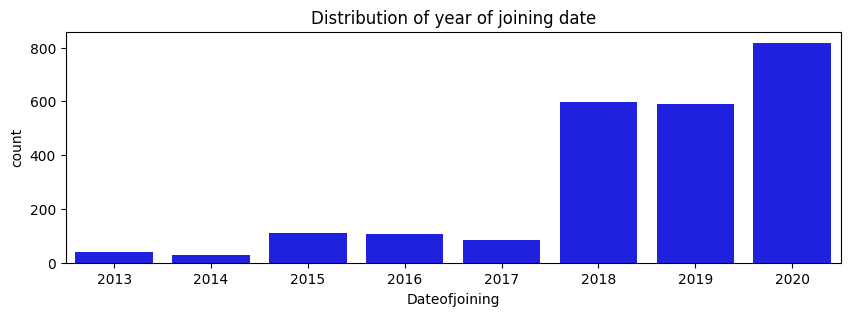

In [74]:
plt.figure(figsize=(10,3))
sns.countplot(x=aggregated['Dateofjoining'].dt.month, color='blue')
plt.title('Distribution of month of joining date')

plt.figure(figsize=(10,3))
sns.countplot(x=aggregated['Dateofjoining'].dt.year, color='blue')
plt.title('Distribution of year of joining date')

Total Business Value w.r.t Grade

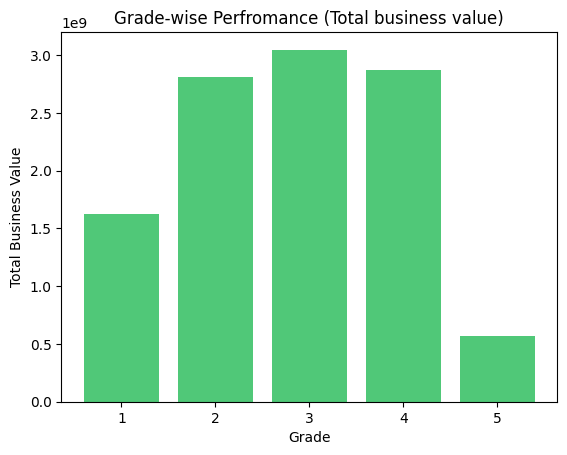

In [75]:
#group data by grade and calculate total business value

grade_wise_value = aggregated.groupby('Grade')['Total Business Value'].sum()

#Create the plot

plt.bar(grade_wise_value.index, grade_wise_value.values, color='#50C878')
plt.xlabel('Grade')
plt.ylabel('Total Business Value')
plt.title('Grade-wise Perfromance (Total business value)')
plt.show()

City with Most Improvement in Quarterly Rating over the past year

In [ ]:
df4 = df.copy()

In [77]:
df4['MMM-YY'] = pd.to_datetime(df4['MMM-YY'])

#Use the last date from the dataset as the reference date

last_date = df4['MMM-YY'].max()
one_year_ago = last_date - pd.DateOffset(years=1)

#Filter data for past year

df_past_year = df4[df4['MMM-YY'] >= one_year_ago]

#Check if dataframe after dataframe after filtering is empty

if df_past_year.empty:
    raise ValueError("No data available for past year")

#Groupby city and calculate the change in quarterly rating

Changed_rating = df_past_year.groupby('City').agg(
    start_rating = ('Quarterly Rating', 'first'),
    end_rating = ('Quarterly Rating', 'last')
).reset_index()

#Calculate the change in quarterly rating

Changed_rating['rating_improvement'] = Changed_rating['end_rating'] - Changed_rating['start_rating']

In [78]:
if Changed_rating.empty or Changed_rating['rating_improvement'].isnull().all():
    raise ValueError("No improvements found")

#Finding the city with the greatest improvement

most_improved_city = Changed_rating.loc[Changed_rating['rating_improvement'].idxmax(), 'City']

print(f'The city with the most improvement in quarterly rating is: {most_improved_city}')

The city with the most improvement in quarterly rating is: C22


Total Business Value w.r.t City

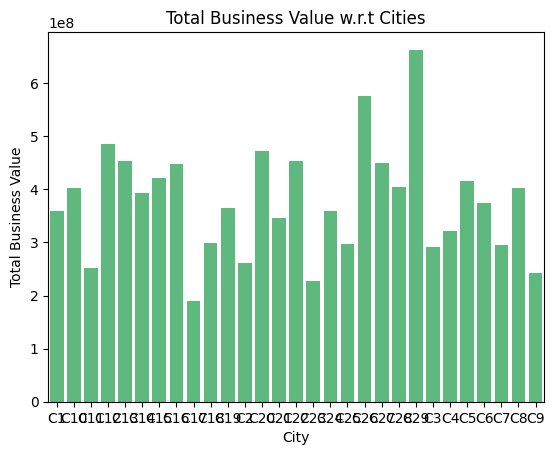

In [ ]:
#Aggregate total business value by city
city_tbv = df4.groupby('City')['Total Business Value'].sum().reset_index()

#Plot the tbv(Total business value) for each city
plt.Figure(figsize=(10,3))
sns.barplot(data=city_tbv, x='City', y='Total Business Value', color='#50C879')

#Add titles and labels
plt.title('Total Business Value w.r.t Cities')
plt.xlabel('City')
plt.ylabel('Total Business Value')
plt.show()

Impact of Time of the Year on Quarterly Rating

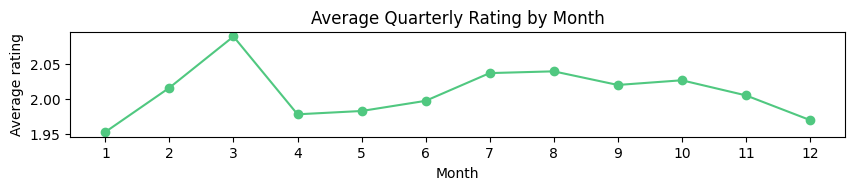

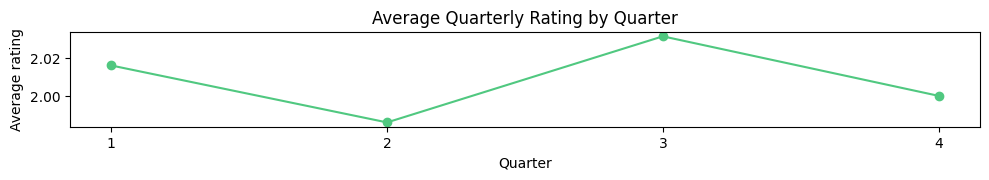

In [ ]:
df4['Month'] = df4['MMM-YY'].dt.month
df4['Quarter'] = df4['MMM-YY'].dt.quarter

#aggregate quarterly rating by month and quarter
rating_by_month = df4.groupby('Month')['Quarterly Rating'].mean()
rating_by_quarter = df4.groupby('Quarter')['Quarterly Rating'].mean()

#Plotting the graph
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(rating_by_month, marker='o', color='#50C880')
plt.title('Average Quarterly Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average rating')
plt.xticks(range(1,13))

#Plotting the graph
plt.figure(figsize=(10,3))

plt.subplot(2,1,1)
plt.plot(rating_by_quarter, marker='o', color='#50C880')
plt.title('Average Quarterly Rating by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average rating')
plt.xticks(range(1,5))

plt.tight_layout()
plt.show()

Impact of each feature on churn

In [81]:
newcat1_cols = ['Gender', 'Education_Level', 'Grade', 'Joining Designation', 'Quarterly Rating', 'Income_increased', 'Rating_change']

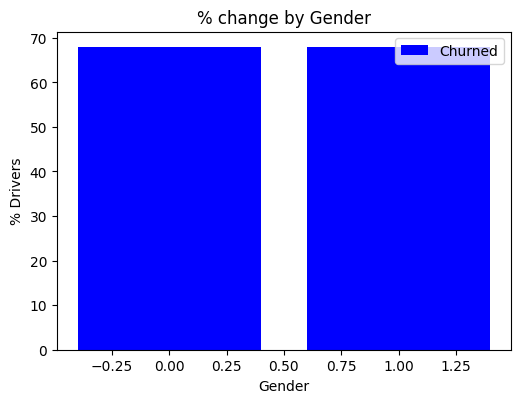

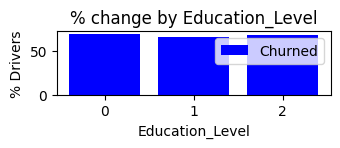

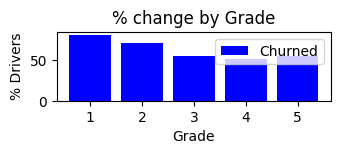

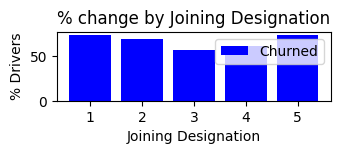

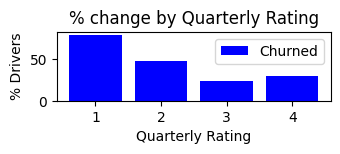

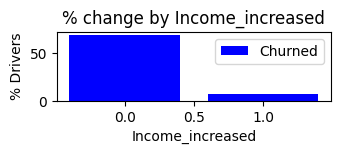

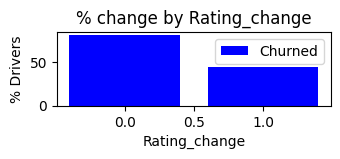

In [82]:
plt.figure(figsize=(10,15))
i=1
for col in newcat1_cols:
    ax=plt.subplot(4,2,i)

    data = aggregated.pivot_table(index=col, columns='Target', aggfunc='size')

    #Convert counts to percentages
    data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
    data.reset_index(inplace=True)

    #Plotting the bars
    plt.bar(data[col], data[1], color='Blue', label='Churned')

    #Labelling and titles
    plt.xlabel(f'{col}')
    plt.ylabel('% Drivers')
    plt.title(f'% change by {col}')
    plt.legend(['Churned', 'Not Churned'])

    i+=1

    plt.tight_layout()
    plt.show()

C:\Users\saksh\AppData\Local\Temp\ipykernel_264\806499132.py:13: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('churned', 'not churned')


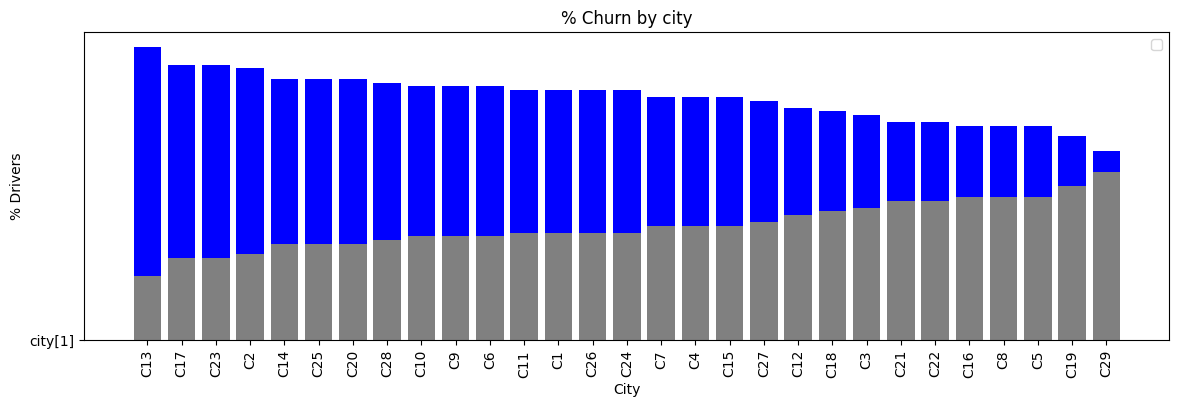

In [83]:
city = aggregated.pivot_table(index='City', columns='Target', aggfunc='size')
city = city.div(city.sum(axis=1), axis=0).multiply(100).round()
city.reset_index(inplace=True)
city = city.sort_values(by=1, ascending=False)

plt.figure(figsize=(14, 4))
plt.bar(city['City'], city[1], color='Blue')
plt.bar(city['City'], city[0], color='Grey', bottom='city[1]')

plt.xlabel('City')
plt.ylabel('% Drivers')
plt.title(f'% Churn by city')
plt.legend('churned', 'not churned')
plt.xticks(rotation=90)
plt.show()

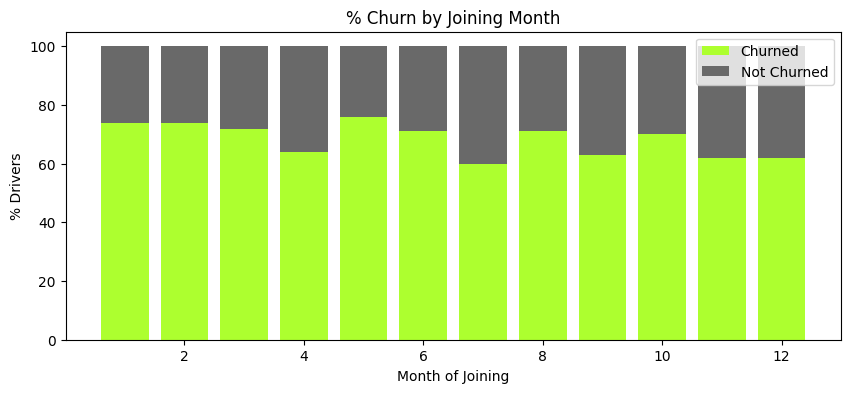

In [85]:
m = aggregated.pivot_table(index=aggregated['Dateofjoining'].dt.month, columns='Target', aggfunc='size')
m = m.div(m.sum(axis=1), axis=0).multiply(100).round()
m.reset_index(inplace=True)
#m = m.sort_values(by=1, ascending=False)

plt.figure(figsize=(10,4))
plt.bar(m['Dateofjoining'], m[1], color='greenyellow')
plt.bar(m['Dateofjoining'], m[0], color='dimgrey', bottom=m[1])

# Labeling and titles
plt.xlabel('Month of Joining')
plt.ylabel('% Drivers')
plt.title(f'% Churn by Joining Month')
plt.legend(['Churned', 'Not Churned'])
plt.show()

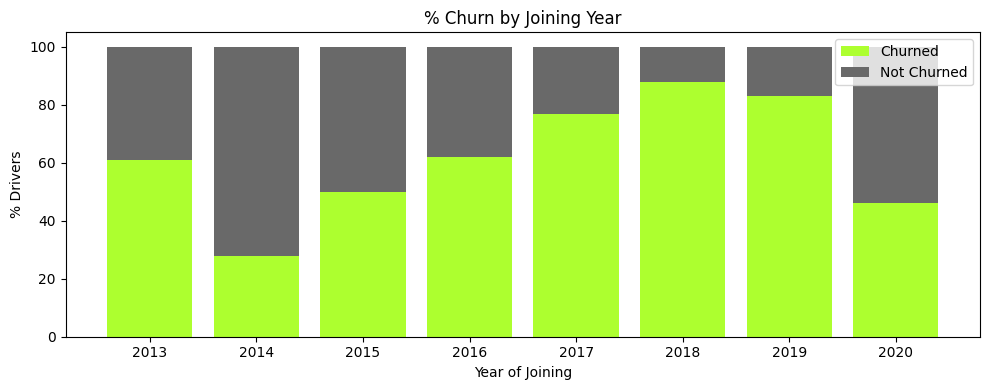

In [86]:
y = aggregated.pivot_table(index=aggregated['Dateofjoining'].dt.year, columns='Target', aggfunc='size')
y = y.div(y.sum(axis=1), axis=0).multiply(100).round()
y.reset_index(inplace=True)

plt.figure(figsize=(10,4))
plt.bar(y['Dateofjoining'], y[1], color='greenyellow')
plt.bar(y['Dateofjoining'], y[0], color='dimgrey', bottom=y[1])

# Labeling and titles
plt.xlabel('Year of Joining')
plt.ylabel('% Drivers')
plt.title(f'% Churn by Joining Year')
plt.legend(['Churned', 'Not Churned'])
plt.tight_layout()
plt.show()

### Observations:

- There is no effect of Gender and Education Level on Churn
- 80% of the Drivers with Grade 1 got churned followed by Grade 2 with almost 70% churn
- Drivers with Joining Designation 1 and 5 got churned the most with almost 75%
- 80% of the Drivers with Quarterly Rating 1 left the company followed by 40% of QR2 and almost 18% of QR3
- Almost 77% of the Drivers who did not get any increase in Rating left the company
- 70% of the Drivers who did not get any increment in income left the company
- 80% of the Drivers from City C13 left the company closely followed by C17 and C23
- There is no significant observation on churn w.r.t joining month
- 90% of the Drivers who joined in the year 2018 left the company followed by 2019 and 2017

In [87]:
import warnings
import matplotlib.colors as mcolors
import seaborn as sns

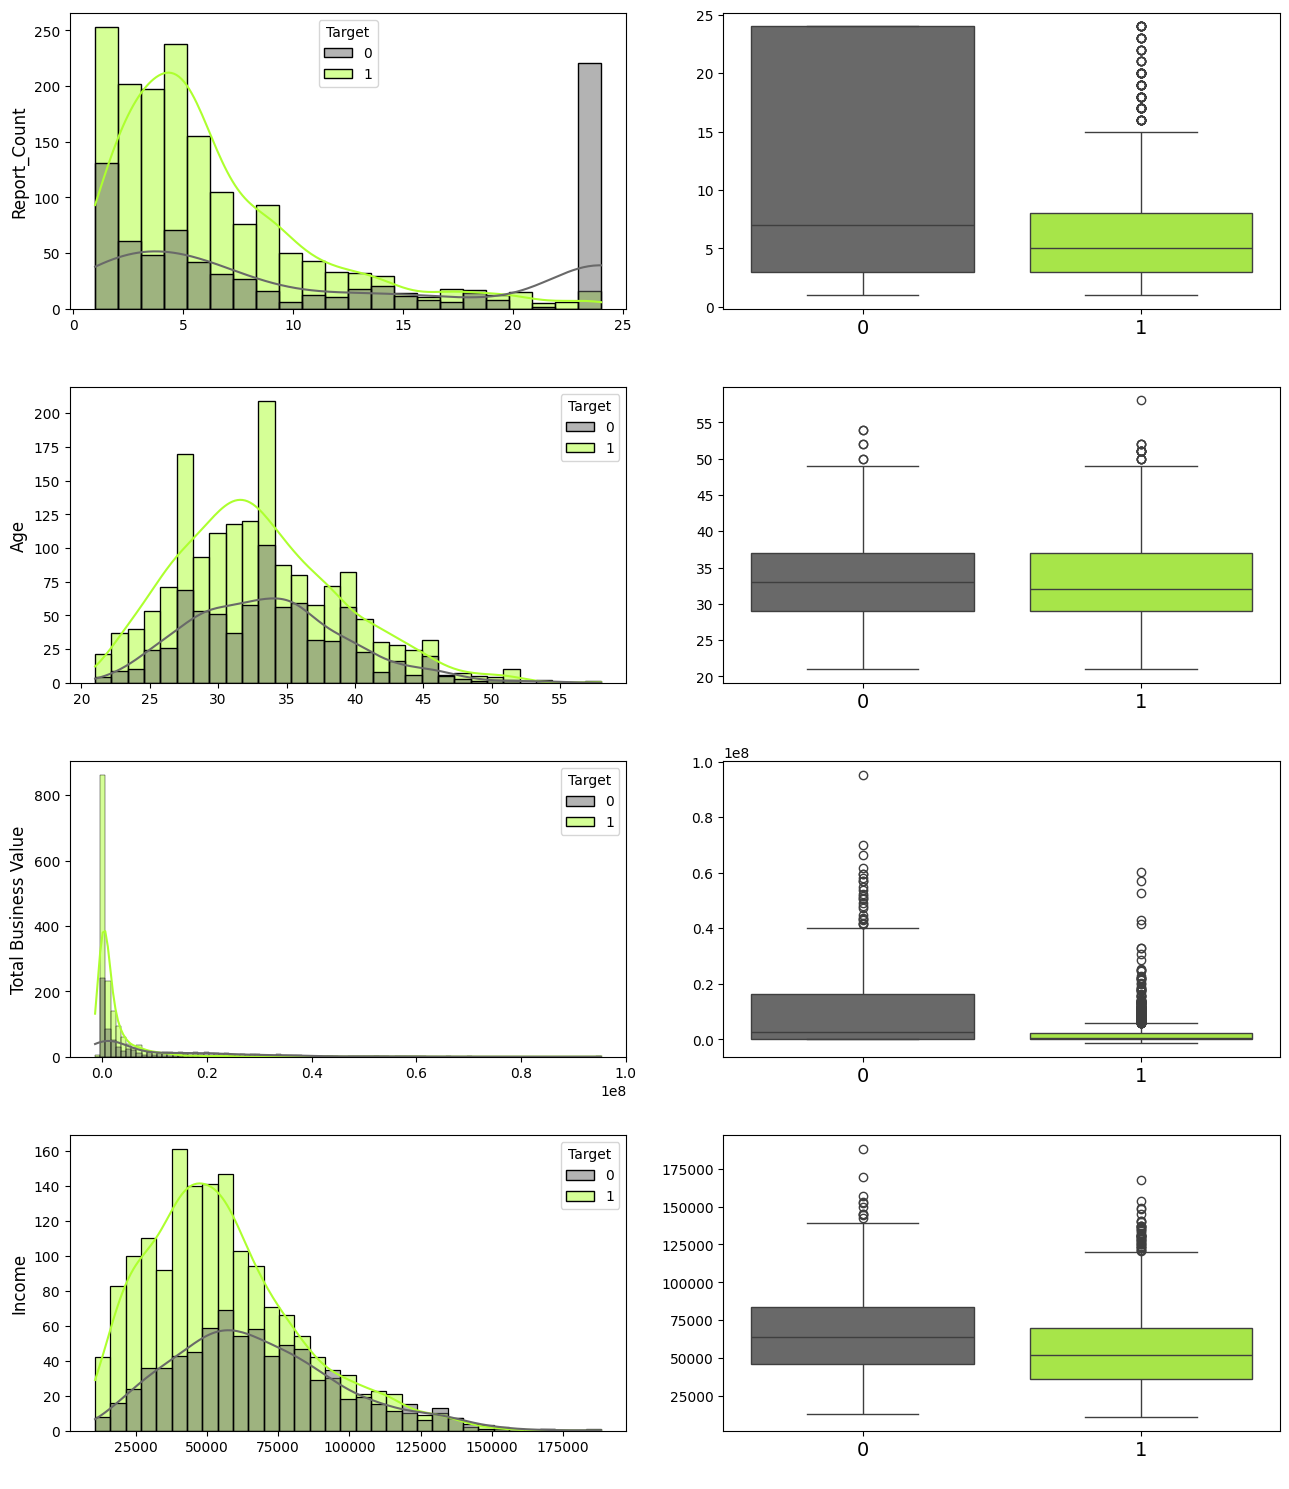

In [88]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(4,2,figsize=(13,15))
i=0
color_dict = {0: 'dimgrey', 1: 'greenyellow'}
for col in num_cols:
    sns.boxplot(data=aggregated, y=col, x='Target', ax=ax[i,1],
               palette=('dimgrey','greenyellow'))
    sns.histplot(data=aggregated, x=col, hue='Target', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

### Observations:

- Number of Reportings and Age are relatively lesser for Drivers who left
- Most of the Drivers getting churned belong to age between 25-35. Distribution is close to normal
- Income is less for the Drivers who left. Distribution is slightly right skewed
- Total Business Value is lesser for Drivers who left. Distribution is right skewed

### RELATIONSHIP AMONG FEATURES

- Correlation
- OLS Regression Analysis
- Hypothesis Testing

In [90]:
numerical_aggregated = aggregated.select_dtypes(include=['int64', 'float64'])

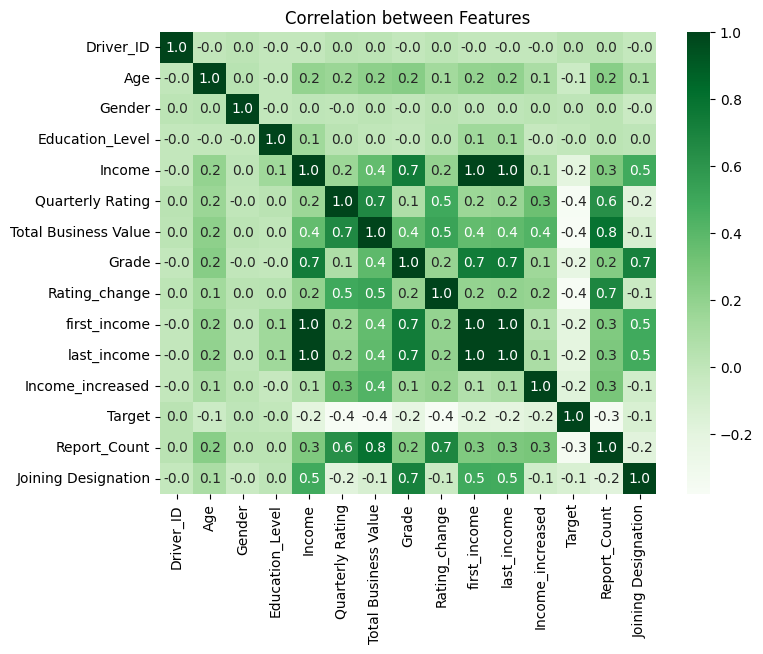

In [91]:
#Correlation among features
plt.figure(figsize=(8,6))
sns.heatmap(numerical_aggregated.corr(), annot=True, fmt=".1f",cmap='Greens')
plt.title('Correlation between Features')
plt.show()

### Highlights:

- Reportings is highly positively correlated to Total Business Value
- Quarterly Rating and Rating_incr are highly correlated for obvious reasons
- Grade is highly positively correlated to Income and Joining Designations
- We can consider to drop few of these features basis above observations. However, multicollinearity can arise due to the combined influence of multiple features, not just pairs.

Impact of significant drop in monthly ratings on total business value

In [94]:
import statsmodels.api as sm

In [95]:
# Define a significant drop in Quarterly Rating
significant_drop_threshold = 2  # Example: A drop of 2 or more points

# Calculate the difference in Quarterly Rating between consecutive quarters
df4['Rating_Drop'] = df4.groupby('Driver_ID')['Quarterly Rating'].diff()

# Identify periods with significant drops
df4['Significant_Drop'] = df4['Rating_Drop'] <= -significant_drop_threshold

# Shift Total Business Value to get the subsequent period's value
df4['Subsequent_Business_Value'] = df4.groupby('Driver_ID')['Total Business Value'].shift(-1)

# Filter rows with significant drops
significant_drops = df4[df4['Significant_Drop']]

# Prepare data for regression analysis
regression_data = significant_drops[['Rating_Drop', 'Subsequent_Business_Value']].dropna()

# Add a constant to the independent variable (required for statsmodels)
regression_data = sm.add_constant(regression_data)

# Fit the regression model
model = sm.OLS(regression_data['Subsequent_Business_Value'], regression_data[['const', 'Rating_Drop']])
results = model.fit()

# Display the regression results
print(results.summary())

# Interpretation of results
if results.pvalues['Rating_Drop'] < 0.05:
    print("There is a significant impact of rating drops on the subsequent period's business value.")
else:
    print("There is no significant impact of rating drops on the subsequent period's business value.")

                                OLS Regression Results                               
Dep. Variable:     Subsequent_Business_Value   R-squared:                       0.034
Model:                                   OLS   Adj. R-squared:                  0.031
Method:                        Least Squares   F-statistic:                     10.04
Date:                       Tue, 05 Aug 2025   Prob (F-statistic):            0.00170
Time:                               19:22:14   Log-Likelihood:                -4078.8
No. Observations:                        284   AIC:                             8162.
Df Residuals:                            282   BIC:                             8169.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

Which features have an impact on quarterly rating

In [97]:
df5 = df4.copy()

In [98]:
numerical_df = df5.select_dtypes(include=['int64', 'float64'])

# Remove non-relevant columns
exclude_columns = ['Reporting_Date', 'Dateofjoining', 'LastWorkingDate']
numerical_df = numerical_df.drop(columns=exclude_columns, errors='ignore')

# Drop rows with missing values
numerical_df.dropna(inplace=True)

# Separate the target variable and features
X = numerical_df.drop('Quarterly Rating', axis=1)
y = numerical_df['Quarterly Rating']

# Add a constant to the feature matrix (required for statsmodels)
X = sm.add_constant(X)

# Fit the regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Extract p-values from the model summary
p_values = model.pvalues

# Filter features with p-value less than 0.05
significant_features = p_values[p_values < 0.05].index.tolist()

# Remove the constant term if it's included in the significant features
if 'const' in significant_features:
    significant_features.remove('const')

print("Significant numerical features impacting Quarterly Rating:")
for feature in significant_features:
    print(feature)

                            OLS Regression Results                            
Dep. Variable:       Quarterly Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.739e+25
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:23:21   Log-Likelihood:             3.5771e+05
No. Observations:               14523   AIC:                        -7.154e+05
Df Residuals:                   14509   BIC:                        -7.153e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

HYPOTHESIS TESTING

In [100]:
from scipy.stats import chi2_contingency

In [105]:
print(df3.columns)

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Quarterly Rating', 'Total Business Value', 'Grade', 'Dateofjoining',
       'LastWorkingDate', 'MMM-YY', 'Rating_change', 'first_income',
       'last_income', 'Income_increased', 'Target', 'Report_Count',
       'Joining Designation'],
      dtype='object')


In [108]:
newcat2_cols = ['Report_Count','Gender','City','Education_Level','Grade','Joining Designation','Quarterly Rating','Rating_change','Income_increased']

In [109]:
for col in newcat2_cols:
    chi2, p, dof, expected = chi2_contingency(pd.crosstab(df3[col], df3['Target']))
    if p>0.05:
        print('>>>>>>Independent feature - Not Significant:', col, '>>p value:', p)

>>>>>>Independent feature - Not Significant: Gender >>p value: 0.7156373417004478
>>>>>>Independent feature - Not Significant: Education_Level >>p value: 0.46643939521309963


Based on Hypothesis Testing and as observed in our Graphical Impact analysis of Churn on Gender and Education_Level, we found same observation that these features are not significant for determining Churn.

However, we shall not remove these features now as this might miss complex non-linear relationships or interactions between multiple features that could be crucial for the model. Which we shall learn in Feature Importance

### Data preperation for modelling
- Encoding
- Scaling
- Train test split
- Class Imbalance-SMOTE

In [112]:
df_prep = aggregated.drop(columns=['Driver_ID','LastWorkingDate'], axis=1)

In [113]:
df_prep['Month']=df_prep['Dateofjoining'].dt.month
df_prep['Year']=df_prep['Dateofjoining'].dt.year

In [114]:
df_prep.drop('Dateofjoining',axis=1,inplace=True)

One Hot Encoding

In [116]:
df_encoded = pd.get_dummies(df_prep, columns=['City'], drop_first=True)

In [117]:
df_encoded.head()

,Age,Gender,Education_Level,Income,Quarterly Rating,Total Business Value,Grade,MMM-YY,Rating_change,first_income,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28,0,2,57387,2,1715580,1,2019-03-01,0,57387.0,...,False,False,False,False,False,False,False,False,False,False
1,31,0,2,67016,1,0,2,2020-12-01,0,67016.0,...,False,False,False,False,False,False,False,True,False,False
2,43,0,2,65603,1,350000,2,2020-04-01,0,65603.0,...,False,False,False,False,False,False,False,False,False,False
3,29,0,0,46368,1,120360,1,2019-03-01,0,46368.0,...,False,False,False,False,False,False,False,False,False,True
4,31,1,1,78728,1,1265000,3,2020-12-01,1,78728.0,...,False,False,False,False,False,False,False,False,False,False


In [119]:
df_encoded.shape

(2381, 45)

Test/Train split

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
#Prepare X and y dataset i.e. independent and dependent datasets

X = df_encoded.drop(['Target'], axis=1)
y = df_encoded['Target']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
print(X_test.dtypes)

Age                              int64
Gender                           int64
Education_Level                  int64
Income                           int64
Quarterly Rating                 int64
Total Business Value             int64
Grade                            int64
MMM-YY                  datetime64[ns]
Rating_change                    int64
first_income                   float64
last_income                    float64
Income_increased                 int64
Report_Count                     int64
Joining Designation              int64
Month                            int32
Year                             int32
City_C10                          bool
City_C11                          bool
City_C12                          bool
City_C13                          bool
City_C14                          bool
City_C15                          bool
City_C16                          bool
City_C17                          bool
City_C18                          bool
City_C19                 

In [142]:
X_train['MMM-YY'] = X_train['MMM-YY'].astype('int64')
X_test['MMM-YY'] = X_test['MMM-YY'].astype('int64')

In [143]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

Check for class imbalance

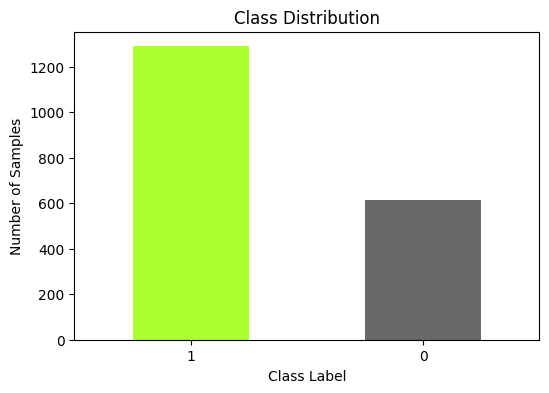

Class Ratio (Majority / Minority): 2.10


In [144]:
# Count class frequencies
class_counts = y_train.value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['greenyellow', 'dimgrey'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Print class ratio (optional)
print(f"Class Ratio (Majority / Minority): {class_counts.iloc[0] / class_counts.iloc[1]:.2f}")

SMOTE

(Synthetic Minority Over-sampling Technique) is often used to handle imbalanced datasets, especially when the target variable has significantly fewer instances of one class compared to the other. If our binary classification problem has an imbalanced target variable, applying SMOTE can help improve model performance by generating synthetic samples of the minority class.

In [158]:
from imblearn.over_sampling import SMOTE

In [159]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

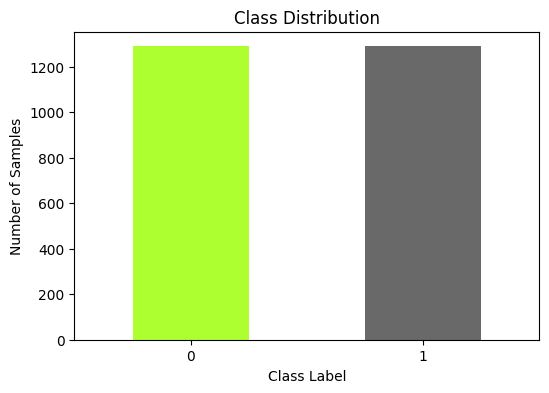

Class Ratio (Majority / Minority): 1.00


In [160]:
# Count class frequencies
class_counts = y_train_res.value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['greenyellow', 'dimgrey'])
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Print class ratio (optional)
print(f"Class Ratio (Majority / Minority): {class_counts.iloc[0] / class_counts.iloc[1]:.2f}")

### ENSEMBLE LEARNING: BAGGING(Random Forest Classifier)

- Hyperparameter Tuning using GridsearchCV
- Model Score / Accuracy Measurement
- Confusion Matrix
- Feature Importance
- ROC Curve & AUC
- Precision Recall Curve

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

In [162]:
params = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

In [163]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params, cv=5, n_jobs=-1, verbose=2)

# Measure the time taken to fit the model
start_time = time.time()
grid_search.fit(X_train_res, y_train_res)
end_time = time.time()

print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print(f"Total training time: {end_time - start_time:.2f} seconds")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found by GridSearchCV: {'ccp_alpha': 0.0005, 'max_depth': 15, 'max_features': 10, 'n_estimators': 400}
Total training time: 148.07 seconds


In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [165]:
# Retrieve the best model (estimator)
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_train_pred = best_model.predict(X_train_res)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
# Accuracy
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.96


In [166]:
grid_search.best_score_

np.float64(0.9600511778430045)

Confusion Matrix / Classification Report

In [167]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[142   8]
 [ 12 315]]


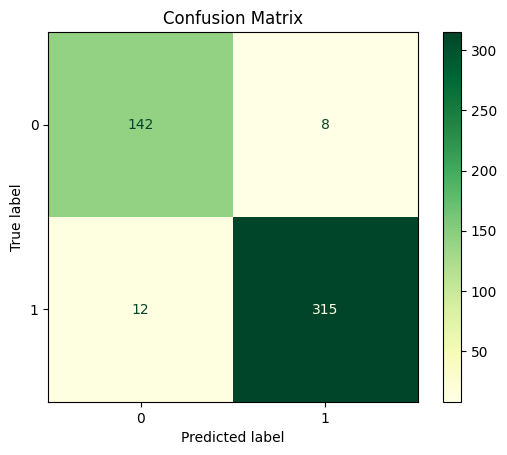

In [168]:
disp = ConfusionMatrixDisplay(conf_matrix)
cmap = plt.cm.YlGn
disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()

In [169]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.98      0.96      0.97       327

    accuracy                           0.96       477
   macro avg       0.95      0.95      0.95       477
weighted avg       0.96      0.96      0.96       477



### Observations:

- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, the precision is 0.82, and for class 1, it is 0.93. This means that when the model predicts class 0, it is correct 82% of the time, and when it predicts class 1, it is correct 93% of the time.

- Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, the recall is 0.85, and for class 1, it is 0.91. This implies that the model is able to capture 85% of the actual class 0 instances and 91% of the actual class 1 instances.

- F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.83, and for class 1, it is 0.92. The weighted average of these scores is 0.89.

- Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, the support is 150, and for class 1, it is 327.

- Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. In this case, the overall accuracy of the model on the test data is 0.89, meaning it correctly predicts the class for 89% of the samples.

Feature Importance

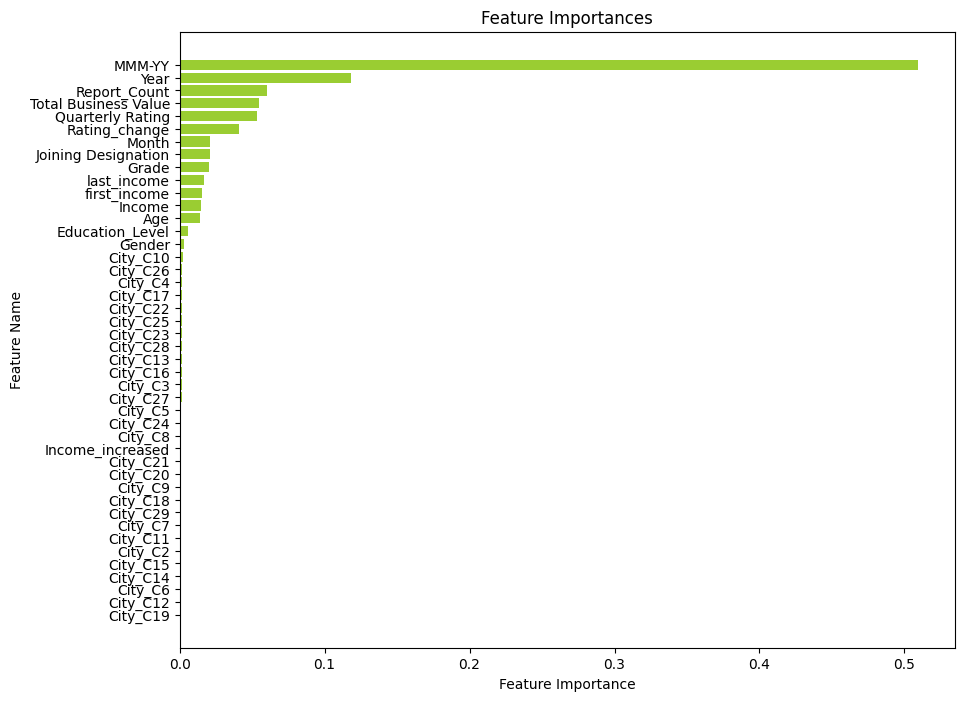

In [170]:
feature_importances = best_model.feature_importances_

# Assuming X_train_res is your training data
# Assuming column_names is a list containing the names of your features
# You may obtain column_names from your DataFrame if you used one initially

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(X_train_res.columns, feature_importances))

# Sort the dictionary by importance values in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
sorted_feature_names = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_importances,color='yellowgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()

### Feature Importance in case of RandomForestClassifier:

- Year is the most important feature in determining Churn followed by Quarterly Ratings, Reportings and Business Values
- Least important is City, Income increment followed by Education Level and Age. Our initial EDA too inferred that Age and Education Level are not significant in determining Churn

ROC Curve & AUC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It helps evaluate and compare different models by illustrating the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

The area under the ROC curve (AUC) is a commonly used metric to quantify the overall performance of a classifier.

A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5. The higher the AUC value, the better the classifier's performance in distinguishing between positive and negative instances.

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score

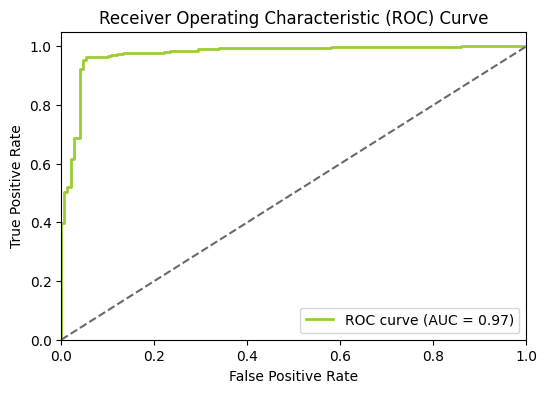

In [172]:
# Make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='yellowgreen', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='dimgrey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Performance Interpretation:

- An AUC of 0.94 means that there is a 94% chance that the model will correctly distinguish between a randomly chosen positive instance and a randomly chosen negative instance.
- High Discrimination Ability: The model has a strong ability to discriminate between the positive and negative classes.

### Practical Implications:

- Model Reliability: An AUC of 0.94 suggests that the model is very reliable for making predictions and has a low likelihood of making incorrect classifications.
- Threshold Selection: The high AUC indicates that the model will perform well across a range of threshold settings, providing flexibility in choosing a threshold that balances sensitivity and specificity according to specific requirements.

Precision Recall Value


The Precision-Recall (PR) curve is another graphical representation commonly used to evaluate the performance of a binary classification model. It provides insights into the trade-off between precision and recall at various classification thresholds.

In [173]:
from sklearn.metrics import precision_recall_curve,auc

In [174]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

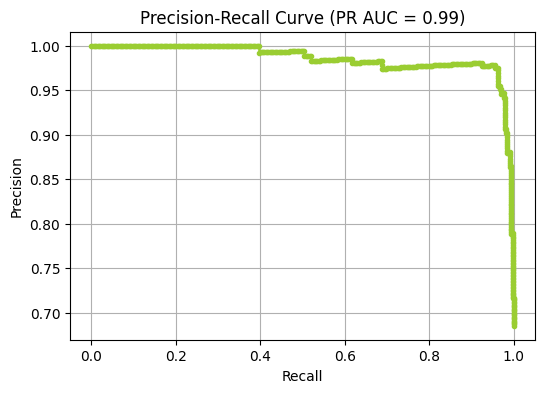

In [175]:
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.',color='yellowgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR AUC = {:.2f})'.format(pr_auc))
plt.grid(True)

# Annotate the PR AUC value on the plot
#plt.text(0.7, 0.2, 'PR AUC = {:.2f}'.format(pr_auc), fontsize=12)

plt.show()

### High PR AUC:

- A PR AUC of 0.97 is very high, indicating that the model has both high precision and high recall across different thresholds.
- This means the model is very good at identifying positive instances without producing many false positives.

### Model Performance:

- High Precision: The model makes very few false positive errors, meaning that most of the positive predictions are correct.
- High Recall: The model successfully identifies a large proportion of actual positive instances, missing very few.

### Context of Imbalanced Datasets:

- PR AUC is particularly informative when dealing with imbalanced datasets. In such scenarios, traditional metrics like accuracy can be misleading because they may be dominated by the majority class.

- The PR AUC provides a clearer picture of how well the model is performing with respect to the minority class (often the more important class in imbalanced datasets).

### ENSEMBLE LEARNING: BOOSTING(LightGBM)

- Hyperparameter Tuning using GridsearchCV
- Model Score / Accuracy Measurement
- Confusion Matrix
- Feature Importance
- ROC Curve & AUC
- Precision Recall Curve

In [176]:
import lightgbm as lgb

In [177]:
import sys
import os

In [180]:
class DummyFile(object):
    def write(self, x):
        pass

# Redirect stderr to dummy file
sys.stderr = DummyFile()

# Suppress LightGBM and other warnings
os.environ['PYTHONWARNINGS'] = 'ignore'

# Reset stderr
sys.stderr = sys.__stderr__

# Reset PYTHONWARNINGS
del os.environ['PYTHONWARNINGS']

# Configure LightGBM to suppress warnings
model = lgb.LGBMClassifier(silent=True, verbose=0)


# Define the grid of parameters to search
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type': ['gbdt'],
    'objective': ['binary'],
    'max_depth': [5, 6, 7, 8],
    'colsample_bytree': [0.5, 0.7],
    'subsample': [0.5, 0.7]
      }
# Setup GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=gridParams, cv=3, scoring='neg_log_loss',verbose=0)

start_time=time.time()
grid.fit(X_train_res, y_train_res)
end_time=time.time()

# Print the best parameters found
print("Best parameters found: ", grid.best_params_)
# Best score
print("Best log loss: ", -grid.best_score_)
print(f"Total training time: {end_time - start_time:.2f} seconds")

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [181]:
# Retrieve the best model (estimator)
best_model = grid.best_estimator_

# Make predictions on the test set
y_train_pred = best_model.predict(X_train_res)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
# Accuracy
train_accuracy = accuracy_score(y_train_res, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
Training Accuracy: 0.99
Test Accuracy: 0.95


### Observations:

- A log loss of 0.238 means that, on average, the model's predicted probabilities are close to the actual outcomes. It indicates that the model's probability predictions are relatively accurate.
- A training accuracy of 0.96 means that the model correctly predicts the class labels for 96% of the samples in the training dataset. It suggests that the model has learned the patterns present in the training data relatively well.
- A test accuracy of 0.90 means that the model correctly predicts the class labels for 90% of the samples in the test dataset. It suggests that the model performs well on unseen data, indicating good generalization ability.

Confusion Matric / Classification Report

In [182]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[137  13]
 [ 12 315]]


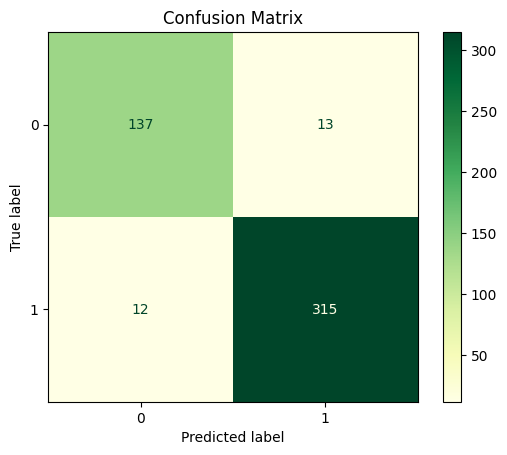

In [183]:
disp = ConfusionMatrixDisplay(conf_matrix)
cmap = plt.cm.YlGn
disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()

In [184]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       150
           1       0.96      0.96      0.96       327

    accuracy                           0.95       477
   macro avg       0.94      0.94      0.94       477
weighted avg       0.95      0.95      0.95       477



- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, the precision is 0.84, and for class 1, it is 0.92. This means that when the model predicts class 0, it is correct 84% of the time, and when it predicts class 1, it is correct 92% of the time.

- Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For class 0, the recall is 0.82, and for class 1, it is 0.93. This implies that the model is able to capture 82% of the actual class 0 instances and 93% of the actual class 1 instances.

- F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.83, and for class 1, it is 0.92. The weighted average of these scores is 0.90

- Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, the support is 150, and for class 1, it is 327.

- Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. In this case, the overall accuracy of the model on the test data is 0.90, meaning it correctly predicts the class for 90% of the samples.

Feature Importance

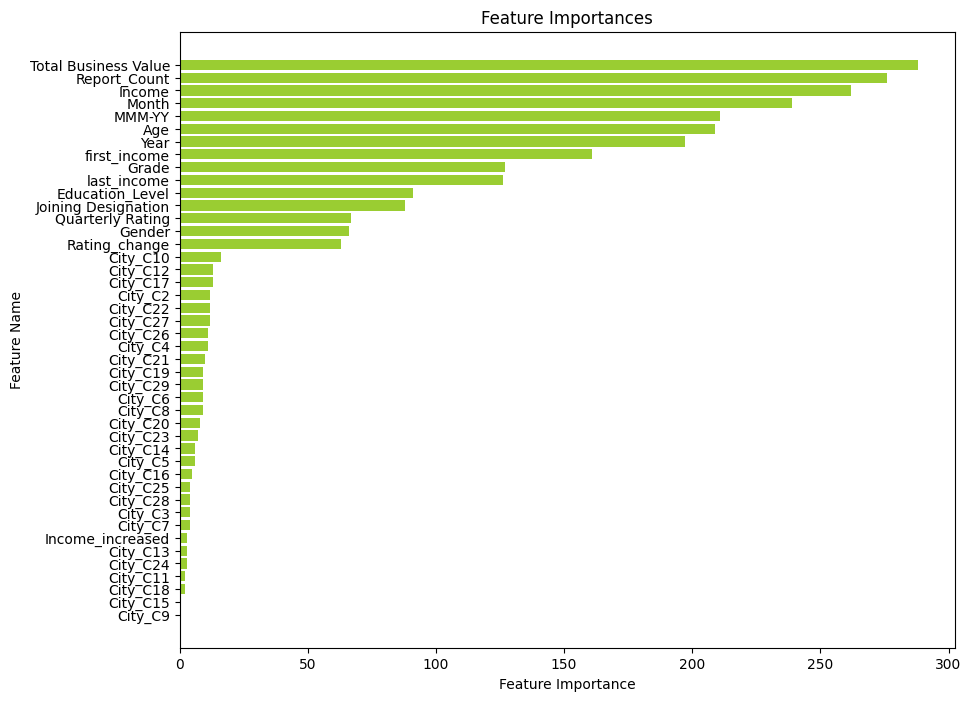

In [185]:
feature_importances = best_model.feature_importances_

# Assuming X_train_res is your training data
# Assuming column_names is a list containing the names of your features
# You may obtain column_names from your DataFrame if you used one initially

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(X_train_res.columns, feature_importances))

# Sort the dictionary by importance values in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
sorted_feature_names = [x[0] for x in sorted_feature_importance]
sorted_importances = [x[1] for x in sorted_feature_importance]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_names, sorted_importances,color='yellowgreen')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()

### Observations:

- Total Business Value is the most important feature followed by Reportings and Income
- City is least important followed by Income_increment and Gender

ROC Curve & AUC

[LightGBM] [Warning] Unknown parameter: silent


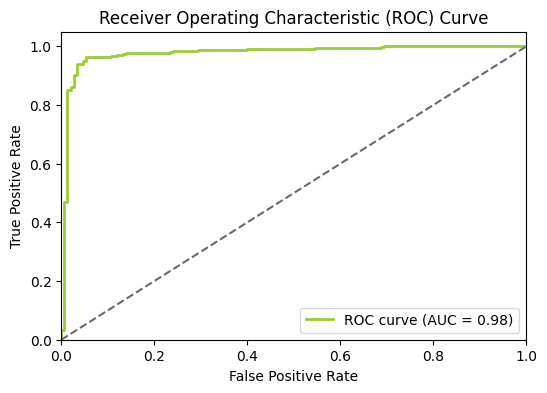

In [186]:
warnings.filterwarnings("ignore")
# Make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='yellowgreen', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='dimgrey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Observations:

An AUC of 0.95 means that the binary classification model has excellent discrimination ability, with high true positive rates and low false positive rates across different thresholds. It suggests that the model performs well in distinguishing between positive and negative samples, making it highly reliable for classification tasks.

Precision Recall Curve

In [187]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

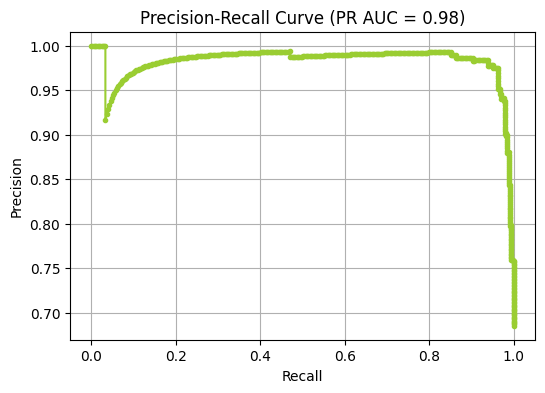

In [188]:
pr_auc = auc(recall, precision)
# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.',color='yellowgreen')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR AUC = {:.2f})'.format(pr_auc))
plt.grid(True)

plt.show()

Observations:

- A PR AUC of 0.97 suggests that the binary classification model performs exceptionally well in terms of both precision and recall.
- It indicates that the model achieves very high precision (the proportion of true positive predictions among all positive predictions) and recall (the proportion of true positive predictions among all actual positive samples) across different thresholds.
- Such PR AUC value implies that the model makes very few false positive and false negative predictions, making it highly reliable for classification tasks, especially in scenarios where both precision and recall are crucial.

### INSIGHTS

Business Insights:

- Five number of reportings are having highest frequency  

- Males are higher in ratio than females among Drivers  

- C20 is the city with maximum drivers  

- Maximum Drivers have Grade 2  

- Maximum number of Drivers have Quarterly Rating as 1  

- 68% of the Drivers have been churned  

- Hardly 2% of the Drivers got Increment in Income  

- 15% of the Drivers got Increase in Rating  

- 73% had their last Quarter Rating as 1 followed by 15% having 2  

- Joining Designation is highest for 1 with 43% followed by 2 with 34%  

- Grade at the time of Reporting is highest for Grade 2 with 36% followed by Grade 1 with 31%  

- Distribution of Education Level for all 3 levels is almost same with 33%  

- C20 is the city with highest number of drivers followed C15  

- Males are higher in numbers with 59% and Females at 41%  

- Most of the Drivers had their last working date in the month of July and year 2019  

- Most of the Drivers joined in the month of July and year 2020  

- Drivers with Grade 3 have highest business value followed by Grade 4 and 2  

- The city with the most improvement in Quarterly Rating over the past year is C22  

- Total Business Value of Drivers is highest in C29 followed by C26  

- Average Quarterly Rating is found to be highest in 3rd Quarter and the same is found highest in the month of March  

- There is no effect of Gender and Education Level on Churn  

- 80% of the Drivers with Grade 1 got churned followed by Grade 2 with almost 70% churn  

- Drivers with Joining Designation 1 and 5 got churned the most with almost 75%  

- 80% of the Drivers with Quarterly Rating 1 left the company followed by 40% of QR2 and almost 18% of QR3  

- Almost 77% of the Drivers who did not get any increase in Rating left the company  

- 70% of the Drivers who did not get any increment in income left the company  

- 80% of the Drivers from City C13 left the company closely followed by C17 and C23  

- There is no significant observation on churn w.r.t joining month  

- 90% of the Drivers who joined in the year 2018 left the company followed by 2019 and 2017  

- Number of Reportings and Age are relatively lesser for Drivers who left  

- Most of the Drivers getting churned belong to age between 25-35. Distribution is close to normal  

- Income is less for the Drivers who left. Distribution is slightly right skewed  

- Total Business Value is lesser for Drivers who left. Distribution is right skewed  

- Reportings is highly positively correlated to Total Business Value  

- Quarterly Rating and Rating_incr are highly correlated for obvious reasons  

- Grade is highly positively correlated to Income and Joining Designations  

- Above analysis helps determine that there is statistically significant impact of drop in Quarterly Rating on the subsequent period's Business Value  

- Above OLS summary indicate impact of Age, Gender, Income, Joining Designation, Grade, Total Business Value on Quarterly Rating  

- Driver's Total Business Value and Churn Rate both are affected by the City they operate in. It can be clearly inferred from the analysis done earlier  


**Ensemble ML Bagging (RandomForestClassifier):**  

- F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.83, and for class 1, it is 0.92. The weighted average of these scores is 0.89.  


**Ensemble ML Boosting (Light GBM):**  

- F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 0, the F1-score is 0.83, and for class 1, it is 0.92. The weighted average of these scores is 0.90.  


### Recommendations

1. **Training and Development**

**Driver Training Programs:**

**Target Audience:** Drivers with Grade 2 and those in high-churn categories.  
**Content:** Improve driving skills, customer service, and adherence to safety protocols.  
**Objective:** Enhance performance and reduce churn rates.

2. **Incentive Schemes**

**Performance-based Incentives:**

**Top Performers:** Reward drivers with high business value and low churn rates.  
**Incentives:** Financial bonuses, recognition programs, and career progression opportunities.  
**Churn Reduction:** Special bonuses for drivers maintaining high quarterly ratings and consistent performance.  
**Focus:** Encourage retention, especially for drivers in high-churn cities.

3. **Recruitment Strategies**

**Targeted Recruitment:** Cities with Growth Potential: Prioritize cities like C22 for recruitment drives.  
**Strategy:** Highlight benefits and career growth opportunities in recruitment campaigns.  

**Demographics:**  
**Age Group:** Focus on drivers aged 25-35, who have shown high performance potential.  
**Gender Balance:** Maintain a balanced recruitment strategy to address gender representation disparities.

4. **Operational Improvements**

**City-Specific Strategies:**  
**High Business Value Cities:** Enhance support and resources in cities like C29 and C26.  
**Initiatives:** Provide better infrastructure, more support staff, and improved working conditions.  

**Churn Management in High-Risk Cities:** Implement special programs in cities with high churn rates (e.g., C13, C17, C23).  
**Approach:** Conduct exit interviews to understand reasons for churn and address them proactively.

5. **Continuous Monitoring and Feedback**

**Feedback Mechanisms:**  
**Driver Surveys:** Regularly collect feedback from drivers about their experiences, challenges, and suggestions.  
**Frequency:** Quarterly surveys and feedback sessions.  

**Customer Feedback:** Gather customer reviews and ratings to identify areas for improvement.  
**Integration:** Use feedback to refine training programs and operational strategies.

6. **Data-Driven Decision Making**

**Utilize Model Insights:**  
**Feature Analysis:** Focus on key features identified by models, such as Total Business Value, Quarterly Ratings, and Reportings.  

**Actionable Insights:** Develop policies and programs based on these critical features.  

**Periodic Model Reviews:** Regularly update and validate models to ensure their relevance and accuracy.  

**Adaptation:** Adjust strategies based on updated insights and emerging trends.

7. **Strategic Partnerships**

**Collaboration with Educational Institutions:**  
**Training Programs:** Partner with driving schools and educational institutions to provide advanced training to drivers.  

**Objective:** Enhance skills and knowledge, leading to better performance and customer satisfaction.

8. **Compensation and Benefits**

**Income Increment and Benefits:**  
**Performance-Linked Pay:** Implement a compensation structure that rewards performance improvements and loyalty.  

**Objective:** Reduce churn by providing financial stability and growth opportunities.  

**Additional Benefits:** Offer health insurance, retirement benefits, and other perks to make the job more attractive.

9. **Operational Efficiency**

**Process Improvements:**  
**Churn Analysis:** Regularly analyze churn data to identify patterns and implement targeted interventions.  

**Proactive Measures:** Develop early warning systems to identify drivers at risk of churn and address their concerns promptly.

**Conclusion:**

Implementing these recommendations will help Ola improve driver retention, enhance performance, and ultimately provide a better service to its customers. The focus should be on targeted training, strategic recruitment, performance-based incentives, and continuous monitoring to adapt to changing dynamics in the transportation industry.